# New ts_gen

In [24]:
import torch
torch.cuda.empty_cache()

In [25]:
from utils.meta_eval import TSGenArgs, create_ds_dict, plot_ds
from experiments.meta_eval.me import me_experiment

args = TSGenArgs()
args.n_epochs = 100
args.test_interval = 100

args.batch_size = 32
args.gnn_depth = 2
args.n_layers = 2
args.h_nf = 32

# args.remove_existing_data = True

exp_log = me_experiment(args)

Starting training...
Starting training...
Starting training...
Starting training...
Starting training...
Starting training...
100%|██████████| 211/211 [00:17<00:00, 12.21it/s]
Epoch 1: Training Loss 0.12431878619147316
Epoch 1: Training Loss 0.12431878619147316
Epoch 1: Training Loss 0.12431878619147316
Epoch 1: Training Loss 0.12431878619147316
Epoch 1: Training Loss 0.12431878619147316
Epoch 1: Training Loss 0.12431878619147316
100%|██████████| 211/211 [00:16<00:00, 12.79it/s]
Epoch 2: Training Loss 0.08616482188323119
Epoch 2: Training Loss 0.08616482188323119
Epoch 2: Training Loss 0.08616482188323119
Epoch 2: Training Loss 0.08616482188323119
Epoch 2: Training Loss 0.08616482188323119
Epoch 2: Training Loss 0.08616482188323119
100%|██████████| 211/211 [00:16<00:00, 13.10it/s]
Epoch 3: Training Loss 0.07953073098063332
Epoch 3: Training Loss 0.07953073098063332
Epoch 3: Training Loss 0.07953073098063332
Epoch 3: Training Loss 0.07953073098063332
Epoch 3: Training Loss 0.07953073098

In [15]:
len(exp_log.test_logs[-1].Ds)

4

In [26]:
file_name = '27.npy'

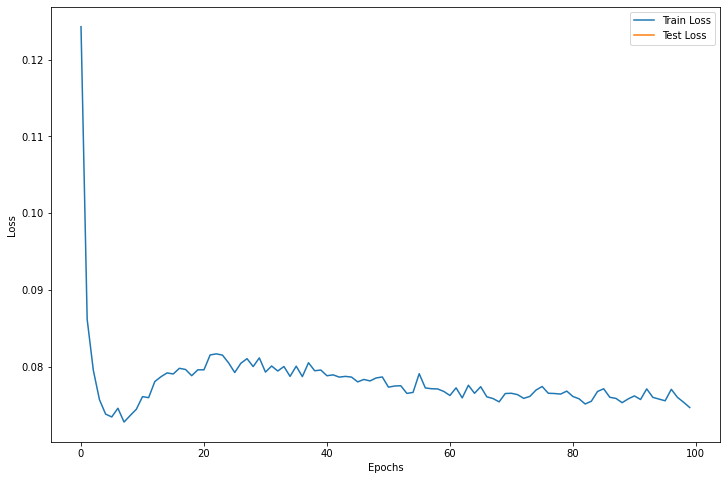

In [27]:
D_folder = 'experiments/meta_eval/d_inits/'
W_folder = 'experiments/meta_eval/ws/'

# 24.npy was 1080s, 8:45PM 19/08

exp_log.save_Ds(file_name, D_folder, save_to_log_dir=True)
exp_log.save_Ws(file_name, W_folder, save_to_log_dir=True)
exp_log.plot_loss(save_fig = True)

### e=100,b=8,h=256, g/l 
- 09/08: no init (dw): 2(2500, 32), 3(2100s, 22), 4(1200, 11) 
- 09/08 no opt (pow): 6(3700, 32), 7(t=3500, 22), 5(2000, 11), 8(t=2400, 11) [6,1,5]
- 09/08: full (opt): 9(3900, 32), 10(3600, 22), 1(?, 11)

### e=100, b=32
- 19-1033 20.npy: g=1,l=2,h=128, t=1500s
- 19-1110 21.npy: g=4,l=1,h=64, t=1750s
- 19-1154 22.npy: g=1,l=6,h=32, t=2280s
- 19-0956PM 27.npy: g=2,l=2,h=32, t=1670s

### e=100, b=64
- 19-1236 23.npy: g=2,l=2,h=64, t=1340s

### e=100, b=128
- 19-0926PM 24.npy: g=4,l=1,h=128, t=2080s

### e=100, b=256
- 19-0906PM 25.npy: g=3,l=1,h=64 [tried at 200 epochs too for 26.npy 0926PM]

/anaconda/envs/3d-rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/anaconda/envs/3d-rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/anaconda/envs/3d-rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

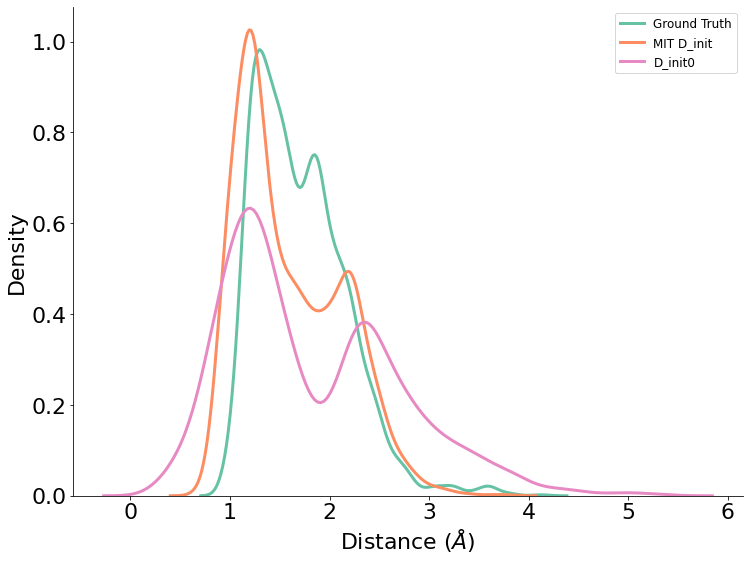

In [28]:
import os
from utils.meta_eval import create_ds_dict, plot_ds

# create ds_dict and plot d_inits
mols_folder = 'data/raw/'
d_folder = 'experiments/meta_eval/d_inits/'
d_plot_name = os.path.join(os.path.dirname(args.log_dir), '27') # None won't save fig

# ens plots
#ens_plot_folder = 'experiments/meta_eval/ens_figs/'
#ens_plot_name = os.path.join(os.path.dirname(ens_plot_folder), 'pow-ens2') # None won't save fig
#ens_plot_name = '11'

# standard: 1(e=100,t=2500s),  6(e=100, t=3850s)

# e=100,b=8,h=256, g/l 
# 09/08: no init (dw): 2(2500, 32), 3(2100s, 22), 4(1200, 11) 
# 09/08 no opt (pow): 6(3700, 32), 7(t=3500, 22), 5(2000, 11), 8(t=2400, 11) [6,1,5]
# 09/08: full (opt): 9(3900, 32), 10(3600, 22), 1(?, 11)


d_files = [file_name] 
ds_not_to_print = ['lin_approx']
ds_dict = create_ds_dict(d_files, d_folder, mols_folder) # TODO: create default d_init class for these?
plot_ds(ds_dict, ds_not_to_print, d_plot_name)

## Ensemble

Average all produced $D_{inits}s$ then plot.

C:\Users\Avish\miniconda3\envs\3d-rdkit\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Avish\miniconda3\envs\3d-rdkit\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Avish\miniconda3\envs\3d-rdkit\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

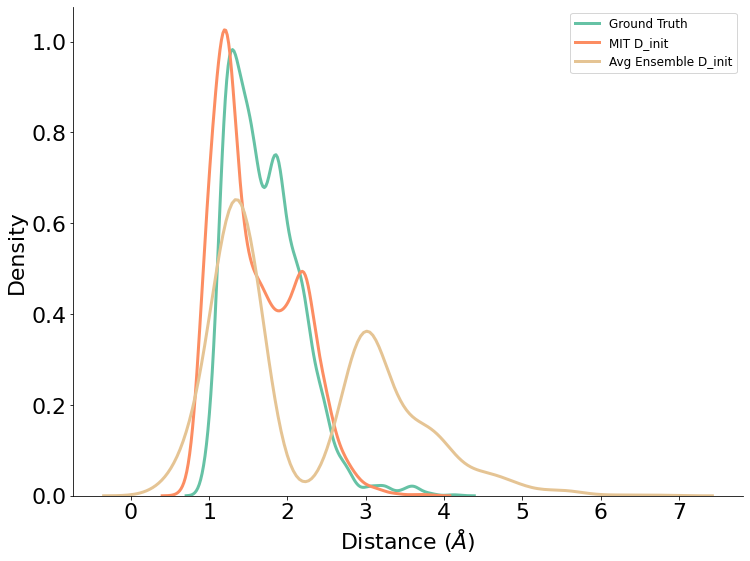

In [15]:
# from utils.meta_eval import ensemble_plot

d_files = ['6.npy', '1.npy', '5.npy'] 
ds_dict = create_ds_dict(d_files, d_folder, mols_folder)
ds_not_to_print = ['lin_approx']

NUM_STD_DS = 3

def ensemble_plot(ds_dict, ds_not_to_print, print_my_ds = False, name = None):
    num_my_ds = len(ds_dict) - NUM_STD_DS
    ens_ds = []
    for i in range(len(ds_dict['mit'][0])):
        ens_d = 0
        for j in range(0, num_my_ds):
            ens_d += ds_dict[f'D_init{j}'][0][i]
        ens_d /= num_my_ds
        ens_ds.append(ens_d)
    ds_dict['ens'] = (ens_ds, "Avg Ensemble D_init")

    if not print_my_ds:
        for j in range(0, num_my_ds):
            ds_not_to_print.append(f'D_init{j}')

    plot_ds(ds_dict, ds_not_to_print, name)

# ens_plot_name = os.path.join(os.path.dirname(ens_plot_folder), 'dw-ens')
ensemble_plot(ds_dict, ds_not_to_print, name = 'pow-ens2')